# Regression : 전통적인 방식 기반

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import tensorflow as tf
import random

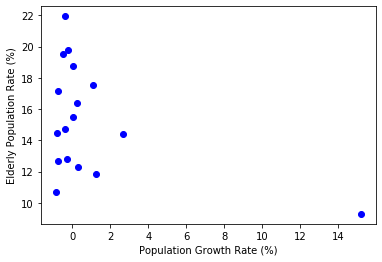

In [3]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

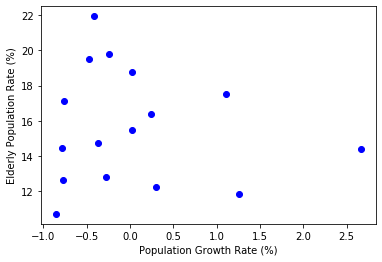

In [4]:
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


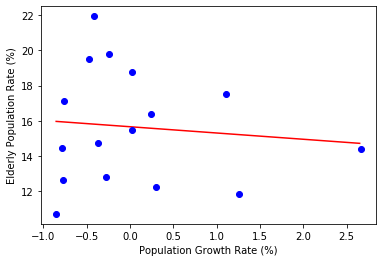

In [7]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)


# 최소제곱법으로 a, b를 구합니다.
# 참고)  --> 2개의 리스트를 하나로 묶기 위해서 zip을 사용함!!!!!!
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [ ]:
# 위에처럼 fitting이 잘 안되는걸 볼수 있다

In [ ]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss



# 여기서는 최적환 함수에 대해서는  Adam을 불러서 사용을 함!!!!! --> 이 외에도 여러 종류가 있음!!!
# 그리고 보통의 learning rate : 0.0001~ 0.1 사이의 값을 사용을 하기는 함....
optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [ ]:
# 다항회귀

99 a: -1.2632389 b: 6.089687 c: -3.940208 d: 6.664936 loss: 59.290115
199 a: -2.0172741 b: 6.793022 c: -2.0656157 d: 10.153799 loss: 29.488365
299 a: -1.6118592 b: 4.916036 c: -0.8604116 d: 12.277959 loss: 19.343285
399 a: -0.83515435 b: 2.5236382 c: -0.55737233 d: 13.768539 loss: 13.698494
499 a: -0.12566869 b: 0.4530829 c: -0.47321725 d: 14.887462 loss: 10.580334
599 a: 0.4154562 b: -1.1120842 c: -0.43222624 d: 15.710018 loss: 9.050322
699 a: 0.79401344 b: -2.2054038 c: -0.40616244 d: 16.281622 loss: 8.384888
799 a: 1.0414864 b: -2.9198983 c: -0.38949013 d: 16.654692 loss: 8.127872
899 a: 1.1932191 b: -3.3579311 c: -0.37933484 d: 16.88332 loss: 8.039699
999 a: 1.2805432 b: -3.610019 c: -0.37349972 d: 17.014881 loss: 8.012856


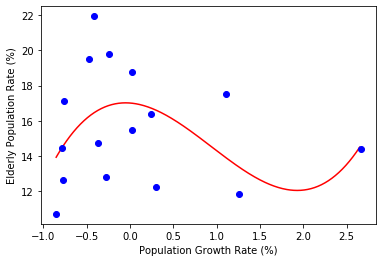

In [9]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
# def compute_loss():
#     y_pred = a * X*X + b * X + c
#     loss = tf.reduce_mean((Y - y_pred) ** 2)
#     return loss
def compute_loss():
#     y_pred = a*X**3 + b * X**2 + c * X + d
    y_pred = a * np.power(X, 3) + b * np.power(X,2) + c * np.power(X,1) + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

# optimizer = tf.keras.optimizers.Adam(lr=0.07)
optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
#     optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [10]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X, Y, epochs=1000)

Train on 16 samples
Epoch 1/1000
16/16 [==============================] - 0s 1000us/sample - loss: 6.7444
Epoch 2/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.7396
Epoch 3/1000
16/16 [==============================] - 0s 969us/sample - loss: 6.7350
Epoch 4/1000
16/16 [==============================] - 0s 948us/sample - loss: 6.7304
Epoch 5/1000
16/16 [==============================] - 0s 961us/sample - loss: 6.7259
Epoch 6/1000
16/16 [==============================] - 0s 963us/sample - loss: 6.7215
Epoch 7/1000
16/16 [==============================] - 0s 966us/sample - loss: 6.7172
Epoch 8/1000
16/16 [==============================] - 0s 956us/sample - loss: 6.7130
Epoch 9/1000
16/16 [==============================] - 0s 953us/sample - loss: 6.7088
Epoch 10/1000
16/16 [==============================] - 0s 971us/sample - loss: 6.7048
Epoch 11/1000
16/16 [==============================] - 0s 939us/sample - loss: 6.7010
Epoch 12/1000
16/16 [=======================

Epoch 97/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.8320
Epoch 98/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.8232
Epoch 99/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.8147
Epoch 100/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.8079
Epoch 101/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.8018
Epoch 102/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.7968
Epoch 103/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.7929
Epoch 104/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.7895
Epoch 105/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.7875
Epoch 106/1000
16/16 [==============================] - 0s 998us/sample - loss: 6.7856
Epoch 107/1000
16/16 [==============================] - 0s 942us/sample - loss: 6.7854
Epoch 108/1000
16/16 [==============================] 

Epoch 192/1000
16/16 [==============================] - 0s 937us/sample - loss: 6.7610
Epoch 193/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.7580
Epoch 194/1000
16/16 [==============================] - 0s 998us/sample - loss: 6.7586
Epoch 195/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.7556
Epoch 196/1000
16/16 [==============================] - 0s 937us/sample - loss: 6.7563
Epoch 197/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.7531
Epoch 198/1000
16/16 [==============================] - 0s 925us/sample - loss: 6.7539
Epoch 199/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.7507
Epoch 200/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.7516
Epoch 201/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.7483
Epoch 202/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.7493
Epoch 203/1000
16/16 [===========================

Epoch 287/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.6793
Epoch 288/1000
16/16 [==============================] - 0s 995us/sample - loss: 6.6823
Epoch 289/1000
16/16 [==============================] - 0s 971us/sample - loss: 6.6778
Epoch 290/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.6809
Epoch 291/1000
16/16 [==============================] - 0s 976us/sample - loss: 6.6764
Epoch 292/1000
16/16 [==============================] - 0s 975us/sample - loss: 6.6794
Epoch 293/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.6749
Epoch 294/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.6780
Epoch 295/1000
16/16 [==============================] - 0s 983us/sample - loss: 6.6734
Epoch 296/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.6766
Epoch 297/1000
16/16 [==============================] - 0s 998us/sample - loss: 6.6720
Epoch 298/1000
16/16 [=============================

Epoch 383/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.6144
Epoch 384/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.6170
Epoch 385/1000
16/16 [==============================] - 0s 946us/sample - loss: 6.6131
Epoch 386/1000
16/16 [==============================] - 0s 986us/sample - loss: 6.6158
Epoch 387/1000
16/16 [==============================] - 0s 953us/sample - loss: 6.6119
Epoch 388/1000
16/16 [==============================] - 0s 932us/sample - loss: 6.6145
Epoch 389/1000
16/16 [==============================] - 0s 988us/sample - loss: 6.6107
Epoch 390/1000
16/16 [==============================] - 0s 999us/sample - loss: 6.6132
Epoch 391/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.6094
Epoch 392/1000
16/16 [==============================] - 0s 995us/sample - loss: 6.6120
Epoch 393/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.6082
Epoch 394/1000
16/16 [=========================

Epoch 478/1000
16/16 [==============================] - 0s 927us/sample - loss: 6.5610
Epoch 479/1000
16/16 [==============================] - 0s 927us/sample - loss: 6.5589
Epoch 480/1000
16/16 [==============================] - 0s 979us/sample - loss: 6.5598
Epoch 481/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.5579
Epoch 482/1000
16/16 [==============================] - 0s 917us/sample - loss: 6.5587
Epoch 483/1000
16/16 [==============================] - 0s 927us/sample - loss: 6.5568
Epoch 484/1000
16/16 [==============================] - 0s 988us/sample - loss: 6.5576
Epoch 485/1000
16/16 [==============================] - 0s 923us/sample - loss: 6.5557
Epoch 486/1000
16/16 [==============================] - 0s 960us/sample - loss: 6.5565
Epoch 487/1000
16/16 [==============================] - 0s 951us/sample - loss: 6.5547
Epoch 488/1000
16/16 [==============================] - 0s 973us/sample - loss: 6.5554
Epoch 489/1000
16/16 [=======================

Epoch 573/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.5115
Epoch 574/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.5105
Epoch 575/1000
16/16 [==============================] - 0s 949us/sample - loss: 6.5106
Epoch 576/1000
16/16 [==============================] - 0s 961us/sample - loss: 6.5096
Epoch 577/1000
16/16 [==============================] - 0s 940us/sample - loss: 6.5096
Epoch 578/1000
16/16 [==============================] - 0s 983us/sample - loss: 6.5086
Epoch 579/1000
16/16 [==============================] - 0s 916us/sample - loss: 6.5087
Epoch 580/1000
16/16 [==============================] - 0s 975us/sample - loss: 6.5076
Epoch 581/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.5077
Epoch 582/1000
16/16 [==============================] - 0s 994us/sample - loss: 6.5066
Epoch 583/1000
16/16 [==============================] - 0s 982us/sample - loss: 6.5068
Epoch 584/1000
16/16 [=========================

Epoch 669/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4685
Epoch 670/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4660
Epoch 671/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4677
Epoch 672/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4652
Epoch 673/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4668
Epoch 674/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4643
Epoch 675/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4660
Epoch 676/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4634
Epoch 677/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4652
Epoch 678/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4626
Epoch 679/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4643
Epoch 680/1000
16/16 [==============================] - 0s 1ms/sa

Epoch 764/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.4274
Epoch 765/1000
16/16 [==============================] - 0s 999us/sample - loss: 6.4301
Epoch 766/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4267
Epoch 767/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4293
Epoch 768/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4259
Epoch 769/1000
16/16 [==============================] - 0s 995us/sample - loss: 6.4286
Epoch 770/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4251
Epoch 771/1000
16/16 [==============================] - 0s 939us/sample - loss: 6.4278
Epoch 772/1000
16/16 [==============================] - 0s 998us/sample - loss: 6.4244
Epoch 773/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.4271
Epoch 774/1000
16/16 [==============================] - 0s 950us/sample - loss: 6.4236
Epoch 775/1000
16/16 [==============================]

Epoch 859/1000
16/16 [==============================] - 0s 935us/sample - loss: 6.3964
Epoch 860/1000
16/16 [==============================] - 0s 970us/sample - loss: 6.3925
Epoch 861/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3957
Epoch 862/1000
16/16 [==============================] - 0s 950us/sample - loss: 6.3918
Epoch 863/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3950
Epoch 864/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3912
Epoch 865/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3943
Epoch 866/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3905
Epoch 867/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3936
Epoch 868/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3898
Epoch 869/1000
16/16 [==============================] - 0s 998us/sample - loss: 6.3930
Epoch 870/1000
16/16 [===========================

Epoch 955/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3655
Epoch 956/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3617
Epoch 957/1000
16/16 [==============================] - 0s 986us/sample - loss: 6.3649
Epoch 958/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3611
Epoch 959/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3642
Epoch 960/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3605
Epoch 961/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3636
Epoch 962/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3599
Epoch 963/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3630
Epoch 964/1000
16/16 [==============================] - 0s 1ms/sample - loss: 6.3593
Epoch 965/1000
16/16 [==============================] - 0s 997us/sample - loss: 6.3624
Epoch 966/1000
16/16 [==============================]

In [12]:
model.predict(X)

array([[15.698564 ],
       [15.928811 ],
       [15.033405 ],
       [15.805539 ],
       [15.1588545],
       [15.725645 ],
       [15.876338 ],
       [15.911647 ],
       [15.928738 ],
       [15.898889 ],
       [15.928514 ],
       [15.904454 ],
       [15.882168 ],
       [15.808782 ],
       [15.928634 ],
       [13.985084 ]], dtype=float32)

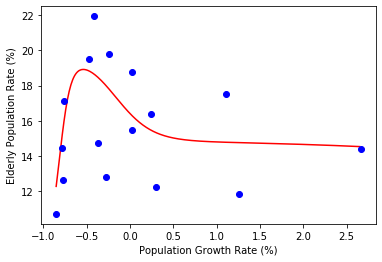

In [16]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [17]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

57344/57026 [==============================] - 0s 2us/step
404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [18]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [22]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
# 앞단하고 끝단은 세팅을 정확히 해야함
# 앞단 : input_shape, 뒷단 : units(output)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

# 첫번째 Param = (input+bias) * hiddenLayerNodes 
# 그래서 728개의 parameter값을 가지고 있음

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_11 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_12 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 각 수학함수 그림

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [23]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

# Epochs = 25, batch_size = 32, validation_split = validation 평가를 위해 이 비율만큼 떼서 자체 테스트

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 2ms/sample - loss: 3.3074 - val_loss: 1.2067
Epoch 2/25
303/303 [==============================] - 0s 92us/sample - loss: 1.0842 - val_loss: 1.1583
Epoch 3/25
303/303 [==============================] - 0s 96us/sample - loss: 0.8850 - val_loss: 1.1853
Epoch 4/25
303/303 [==============================] - 0s 101us/sample - loss: 0.7584 - val_loss: 1.0402
Epoch 5/25
303/303 [==============================] - 0s 97us/sample - loss: 0.6818 - val_loss: 1.0390
Epoch 6/25
303/303 [==============================] - 0s 98us/sample - loss: 0.6742 - val_loss: 1.1267
Epoch 7/25
303/303 [==============================] - 0s 100us/sample - loss: 0.7401 - val_loss: 1.1032
Epoch 8/25
303/303 [==============================] - 0s 98us/sample - loss: 0.6612 - val_loss: 1.2347
Epoch 9/25
303/303 [==============================] - 0s 94us/sample - loss: 0.6614 - val_loss: 1.1124
Epoch 10/25
303/303 [=====

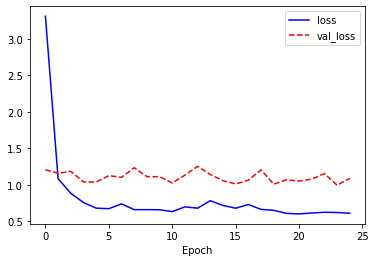

In [24]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

미리 러닝을 멈춰버리는 것에 대한것
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

# 첫번째 Param = (input+bias) * hiddenLayerNodes 
# 그래서 728개의 parameter값을 가지고 있음

model.summary()

# moniter 평가지표에 대해서 더이상 n번 상향이 없는경우엔 그만함
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_15 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_16 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________
Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 2ms/sample - loss: 1.9199 - val_loss: 1.2710
Epoch 2/25
303/303 [==============================] - 0s 92us/sample - loss: 0.8838 - val_loss: 1.4000

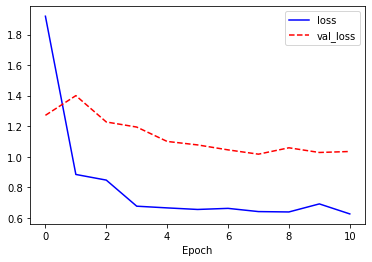

In [30]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [31]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.677650582556631

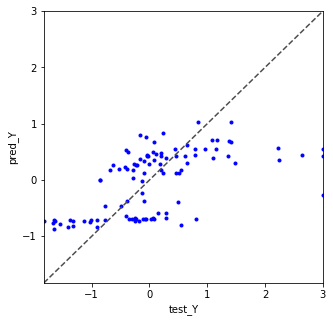

In [32]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()